# Relax Challenge
"""
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period , identify which factors predict future user
adoption .

The data is available as two attached CSV files:
    takehome_user_engagement. csv
    takehome_users . csv
    
"""    
 

In [1]:
# Load Data
import pandas as pd
df_engage = pd.read_csv('takehome_user_engagement.csv')
df_users = pd.read_csv('takehome_users.csv', encoding = 'latin')

In [2]:
# EDA
print(df_engage.shape)
print(df_users.shape)

(207917, 3)
(12000, 10)


In [3]:
df_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df_engage.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [6]:
df_users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [7]:
df_engage.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# Adopted User
"""
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period 
"""

In [9]:
#group users by week, and sums number of visits per week
df_engage['time_stamp'] = pd.to_datetime(df_engage['time_stamp']) #transform time_stamp to datetime object
df_engage = df_engage.set_index(pd.DatetimeIndex(df_engage['time_stamp']))
grp_users = df_engage.groupby('user_id').resample('1W').sum()

In [10]:
print(grp_users.shape)
grp_users.describe()
grp_users.info()

(82282, 2)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 82282 entries, (1, 2014-04-27 00:00:00) to (12000, 2014-01-26 00:00:00)
Data columns (total 2 columns):
user_id    68807 non-null float64
visited    68807 non-null float64
dtypes: float64(2)
memory usage: 1.6 MB


In [11]:
grp_users.head()

user_id  visited
user_id time_stamp                  
1       2014-04-27      1.0      1.0
2       2013-11-17      2.0      1.0
        2013-11-24      NaN      NaN
        2013-12-01      2.0      1.0
        2013-12-08      NaN      NaN

In [12]:
# remove weeks with NaN
grp_users = grp_users[grp_users['user_id'].isnull()==False].drop('user_id',axis=1)
grp_users.head(20)

visited
user_id time_stamp         
1       2014-04-27      1.0
2       2013-11-17      1.0
        2013-12-01      1.0
        2013-12-15      1.0
        2013-12-29      1.0
        2014-01-05      1.0
        2014-01-12      1.0
        2014-02-09      3.0
        2014-02-16      2.0
        2014-03-09      1.0
        2014-03-16      1.0
        2014-04-06      1.0
3       2013-03-24      1.0
4       2013-05-26      1.0
5       2013-01-27      1.0
6       2013-12-22      1.0
7       2012-12-23      1.0
10      2013-01-20      1.0
        2013-01-27      1.0
        2013-02-03      1.0

In [13]:
# identify adopted users
import numpy as np

active_users = grp_users['visited']>=3

#Groups by users and sums up the number of weeks that had 3 or more visits
active_users = active_users.groupby(level=0).apply(np.sum) 

#removes users with no weeks that had 3 or more visits
active_users = active_users[active_users!=0]

active_users = pd.DataFrame(active_users,index=active_users.index)
active_users.columns = ['Active Weeks']
active_users.head(5)

,Active Weeks
user_id,
2,1
10,52
20,1
33,1
42,68


In [14]:
print(active_users.shape)
active_users.info()

(1445, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 2 to 11988
Data columns (total 1 columns):
Active Weeks    1445 non-null int64
dtypes: int64(1)
memory usage: 22.6 KB


In [15]:
#Pull data on adopted users
adopted_user = active_users.merge(df_users,left_index=True,right_on='object_id',how='inner')
adopted_user['Adopted']=1
adopted_user.head()

,Active Weeks,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
1,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
9,52,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1
19,1,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,1
32,1,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,1
41,68,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,1


In [16]:
#Add Adopted column to origional Data
df_users['Adopted']=int(0)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
Adopted                       12000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [17]:
df_users.iloc[list(adopted_user.index),10]=1

In [18]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
Adopted                       12000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [19]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


# Feature engineering

In [20]:
# Feature engineering
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
Adopted                       12000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [109]:
df_features = df_users.copy(deep=True)
df_features = df_features.set_index('object_id').sort_index()
df_features = df_features.drop([ 'name', 'email','last_session_creation_time',],axis=1)
date_feature = df_features.pop('creation_time')
df_features.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
object_id,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0
2,ORG_INVITE,0,0,1,316.0,1
3,ORG_INVITE,0,0,94,1525.0,0
4,GUEST_INVITE,0,0,1,5151.0,0
5,GUEST_INVITE,0,0,193,5240.0,0


In [110]:
df_features['Adopted'].value_counts()

0    10555
1     1445
Name: Adopted, dtype: int64

In [111]:
df_features['Adopted'].mean()*100

12.041666666666668

In [112]:
#percentage of engaged users by email opt in
df_features[['opted_in_to_mailing_list','Adopted']].groupby('opted_in_to_mailing_list')['Adopted'].mean()*100 

opted_in_to_mailing_list
0    11.847657
1    12.625251
Name: Adopted, dtype: float64

In [113]:
#percentage of engaged users by enabled_for_marketing_drip
df_features[['enabled_for_marketing_drip','Adopted']].groupby('enabled_for_marketing_drip')['Adopted'].mean()*100

enabled_for_marketing_drip
0    11.961207
1    12.500000
Name: Adopted, dtype: float64

In [114]:
#percentage of engaged users by enabled_for_marketing_drip
df_features[['enabled_for_marketing_drip','Adopted']].groupby('enabled_for_marketing_drip')['Adopted'].mean()*100

enabled_for_marketing_drip
0    11.961207
1    12.500000
Name: Adopted, dtype: float64

In [ ]:
# Users signing up with as a Guest Invite has the highest chance of being an adopted user at 15%

In [115]:
df_features[(df_features['creation_source']=='GUEST_INVITE') &
         (df_features['enabled_for_marketing_drip']==1) &
         (df_features['opted_in_to_mailing_list']==1)]['Adopted'].mean()*100

15.18987341772152

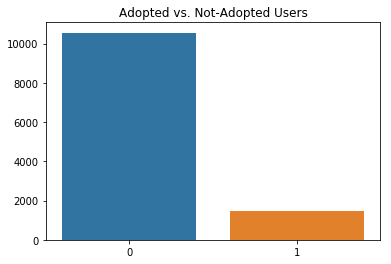

In [116]:
# Take another look at the distribution of the target class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = list(df_features['Adopted'].value_counts().index), y = df_features['Adopted'].value_counts())
plt.ylabel('')
plt.title('Adopted vs. Not-Adopted Users')
plt.show()

In [117]:
df_features['invited_by_user_id'] = df_features['invited_by_user_id'].fillna(0)
df_features['invited_by_user_id'] = df_features['invited_by_user_id'].apply(
        lambda x: 1 if x!=0 else 0)

# One-hot-encode creation_source# One-ho
df_features = pd.get_dummies(data=df_features,columns=['creation_source'])
df_features.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,
1,1,0,11,1,0,1,0,0,0,0
2,0,0,1,1,1,0,1,0,0,0
3,0,0,94,1,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,0,0
5,0,0,193,1,0,1,0,0,0,0


In [118]:
df_features['org_id'].value_counts().head(15)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
8      97
14     87
11     75
12     75
17     74
Name: org_id, dtype: int64

In [119]:
df_features[df_features['Adopted'] == 1]['org_id'].value_counts().shape

(396,)

In [ ]:
# A number of different org_ids, some with a high count. But the orig_id lacks descriptive information
# Will focus on the org_ids with high count

In [120]:
# Regroup new org_id into Org_class as whether the org_id belongs to top 10 count
df_features['Org_class']='Low'
high_org = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10]
df_features.Org_class[df_features.org_id.isin(high_org)] = 'High'



C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [121]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
org_id                                12000 non-null int64
invited_by_user_id                    12000 non-null int64
Adopted                               12000 non-null int64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
Org_class                             12000 non-null object
dtypes: int64(5), object(1), uint8(5)
memory usage: 714.8+ KB


In [122]:
df_features[df_features['Adopted'] == 1]['Org_class'].value_counts().shape

(2,)

In [123]:
df_features['Org_class'].value_counts()

Low     10307
High     1693
Name: Org_class, dtype: int64

In [124]:
df_features=df_features.drop('org_id',axis=1)

In [125]:
df_features = pd.get_dummies(data=df_features,columns=['Org_class'])

In [126]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
invited_by_user_id                    12000 non-null int64
Adopted                               12000 non-null int64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
Org_class_High                        12000 non-null uint8
Org_class_Low                         12000 non-null uint8
dtypes: int64(4), uint8(7)
memory usage: 550.8 KB


In [127]:
df_features.corr()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,Adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,Org_class_High,Org_class_Low
opted_in_to_mailing_list,1.000000,0.483529,0.006934,0.010339,0.000667,0.006694,-0.007432,0.002181,-0.004555,-0.010734,0.010734
enabled_for_marketing_drip,0.483529,1.000000,0.002216,0.005901,-0.002438,0.004270,-0.007518,0.004528,0.000127,-0.018686,0.018686
invited_by_user_id,0.006934,0.002216,1.000000,0.022735,0.437386,0.691238,-0.495336,-0.491916,-0.387255,0.005600,-0.005600
Adopted,0.010339,0.005901,0.022735,1.000000,0.043657,-0.011376,-0.072093,0.016004,0.031432,-0.060953,0.060953
creation_source_GUEST_INVITE,0.000667,-0.002438,0.437386,0.043657,1.000000,-0.347502,-0.216653,-0.215157,-0.169380,0.002389,-0.002389
creation_source_ORG_INVITE,0.006694,0.004270,0.691238,-0.011376,-0.347502,1.000000,-0.342395,-0.340031,-0.267686,0.003919,-0.003919
creation_source_PERSONAL_PROJECTS,-0.007432,-0.007518,-0.495336,-0.072093,-0.216653,-0.342395,1.000000,-0.211995,-0.166891,0.008911,-0.008911
creation_source_SIGNUP,0.002181,0.004528,-0.491916,0.016004,-0.215157,-0.340031,-0.211995,1.000000,-0.165739,-0.017962,0.017962
creation_source_SIGNUP_GOOGLE_AUTH,-0.004555,0.000127,-0.387255,0.031432,-0.169380,-0.267686,-0.166891,-0.165739,1.000000,0.001948,-0.001948
Org_class_High,-0.010734,-0.018686,0.005600,-0.060953,0.002389,0.003919,0.008911,-0.017962,0.001948,1.000000,-1.000000


In [128]:
# Prepare to Model

from sklearn.metrics   import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
list(df_features.columns.values)

['opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'invited_by_user_id',
 'Adopted',
 'creation_source_GUEST_INVITE',
 'creation_source_ORG_INVITE',
 'creation_source_PERSONAL_PROJECTS',
 'creation_source_SIGNUP',
 'creation_source_SIGNUP_GOOGLE_AUTH',
 'Org_class_High',
 'Org_class_Low']

In [130]:
#  Preparing for most important features for prediction .
cols = list(df_features.columns.values)
feature_cols = [col for col in cols]
y_pos = np.arange(len(feature_cols))

In [131]:
# Data Imbalance
"""
we use SMOTE method to synthetically generate 
samples in the minority group to match the majority group's count.
"""
from imblearn.over_sampling import SMOTE

In [132]:
# Get target and features
y = df_features.pop('Adopted')
X = df_features

In [133]:
# Split data test/train

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9000, 10) (3000, 10) (9000,) (3000,)


In [134]:
# SMOTE 
import numpy as np
X_train_smote, y_train_smote = SMOTE().fit_sample(X_train, y_train)


In [135]:
# Define ml_model_1:
# takes in model Instantiate model (model)
# fits, predicts, and evaluates (prints results)
def ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test):
    print('Running ', modelnm)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Evaluate
    print(modelnm,' score: ',model.score(X_test, y_test))
    print(' ')
    # Compute and print the confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [ ]:
# Running a few models

In [136]:
# Logistic Regression
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
lr = LogisticRegression(random_state=0)
lr_pred = ml_model_1(lr, 'LogisticRegression', X_train, X_test, y_train, y_test)

Running  LogisticRegression
LogisticRegression  score:  0.8783333333333333
 
[[2635    0]
 [ 365    0]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      2635
          1       0.00      0.00      0.00       365

avg / total       0.77      0.88      0.82      3000



C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:
# Logistic Regression  using SMOTE  X_train_smote, y_train_smote
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
lr = LogisticRegression(random_state=0)
lr_pred = ml_model_1(lr, 'LogisticRegression', X_train_smote, X_test, y_train_smote, y_test)

Running  LogisticRegression
LogisticRegression  score:  0.532
 
[[1387 1248]
 [ 156  209]]
             precision    recall  f1-score   support

          0       0.90      0.53      0.66      2635
          1       0.14      0.57      0.23       365

avg / total       0.81      0.53      0.61      3000



In [138]:
# KNeighborsClassifier
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn_pred = ml_model_1(knn, 'KNeighborsClassifier', X_train, X_test, y_train, y_test)

Running  KNeighborsClassifier
KNeighborsClassifier  score:  0.7796666666666666
 
[[2292  343]
 [ 318   47]]
             precision    recall  f1-score   support

          0       0.88      0.87      0.87      2635
          1       0.12      0.13      0.12       365

avg / total       0.79      0.78      0.78      3000



In [139]:
# KNeighborsClassifier  using SMOTE X_train_smote, y_train_smote
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn_pred = ml_model_1(knn, 'KNeighborsClassifier', X_train_smote, X_test, y_train_smote, y_test)

Running  KNeighborsClassifier
KNeighborsClassifier  score:  0.7453333333333333
 
[[2159  476]
 [ 288   77]]
             precision    recall  f1-score   support

          0       0.88      0.82      0.85      2635
          1       0.14      0.21      0.17       365

avg / total       0.79      0.75      0.77      3000



In [140]:
# RandomForestClassifier
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_pred = ml_model_1(rf, 'RandomForestClassifier', X_train, X_test, y_train, y_test)

Running  RandomForestClassifier
RandomForestClassifier  score:  0.8783333333333333
 
[[2635    0]
 [ 365    0]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      2635
          1       0.00      0.00      0.00       365

avg / total       0.77      0.88      0.82      3000



C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [141]:
# RandomForestClassifier using SMOTE X_train_smote, y_train_smote
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_pred = ml_model_1(rf, 'RandomForestClassifier', X_train_smote, X_test, y_train_smote, y_test)

Running  RandomForestClassifier
RandomForestClassifier  score:  0.557
 
[[1481 1154]
 [ 175  190]]
             precision    recall  f1-score   support

          0       0.89      0.56      0.69      2635
          1       0.14      0.52      0.22       365

avg / total       0.80      0.56      0.63      3000



In [142]:
# GradientBoostingClassifier
# from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=7)
gbc_pred = ml_model_1(gbc, 'GradientBoostingClassifier', X_train, X_test, y_train, y_test)

Running  GradientBoostingClassifier
GradientBoostingClassifier  score:  0.8783333333333333
 
[[2635    0]
 [ 365    0]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      2635
          1       0.00      0.00      0.00       365

avg / total       0.77      0.88      0.82      3000



C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [143]:
# GradientBoostingClassifier using SMOTE X_train_smote, y_train_smote
# from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=7)
gbc_pred = ml_model_1(gbc, 'GradientBoostingClassifier', X_train_smote, X_test, y_train_smote, y_test)

Running  GradientBoostingClassifier
GradientBoostingClassifier  score:  0.557
 
[[1481 1154]
 [ 175  190]]
             precision    recall  f1-score   support

          0       0.89      0.56      0.69      2635
          1       0.14      0.52      0.22       365

avg / total       0.80      0.56      0.63      3000



In [ ]:
# top  performing algorithm 
GradientBoostingClassifier  
GradientBoostingClassifier  score:  0.8783333333333333
 
[[2635    0]
 [ 365    0]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      2635
          1       0.00      0.00      0.00       365

avg / total       0.77      0.88      0.82      3000




In [144]:
print(X_train_smote.shape, y_train_smote.shape, X_test.shape,  y_test.shape, X_train.shape, y_train.shape)

(15840, 10) (15840,) (3000, 10) (3000,) (9000, 10) (9000,)


In [145]:
# Examine the model feature importance.
gbc.feature_importances_.shape

(10,)

In [146]:
features = pd.Series(gbc.feature_importances_, index=X.columns)

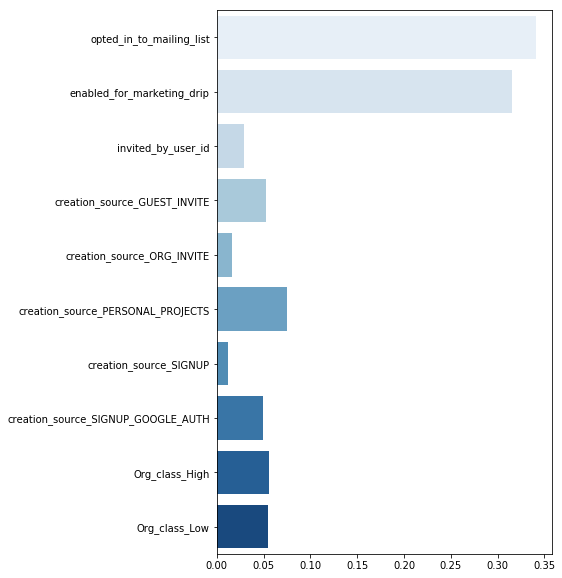

In [147]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=gbc.feature_importances_, palette='Blues')
plt.show()

# Conclusion

Takeaways from the data exploration that the company could move forward with:

The opted_in_to_mailing_list is the most important feature regarding prediction of an adopted user,
  closely followed by enabled_for_marketing_drip

Source Creation - Guest Invite has the highest chance of being an adopted user at 15%

Adopted users seen here were not on the mailing list or part of the regular marketing drip, which means that these two avenues of company outreach may not be worth continuing

